# Analyzing Portfolio Risk and Return

### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [214]:
# Import the required libraries and dependencies
# YOUR CODE HERE
import csv
import os
import requests
import numpy as np
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [175]:
# Import the data by reading in the CSV file and setting the DatetimeIndex 
# Review the first 5 rows of the DataFrame
# YOUR CODE HERE
whale_path = Path('../Resources/whale_navs.csv')
whale_navs_df = pd.read_csv(whale_path,index_col=0,parse_dates=True,infer_datetime_format=True)
whale_navs_df.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [176]:
# Prepare for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drop any rows with all missing values
# Review the first five rows of the daily returns DataFrame.
# YOUR CODE HERE

daily_returns = whale_navs_df.pct_change().dropna()
daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Daily Returns vs S&P '}, xlabel='date'>

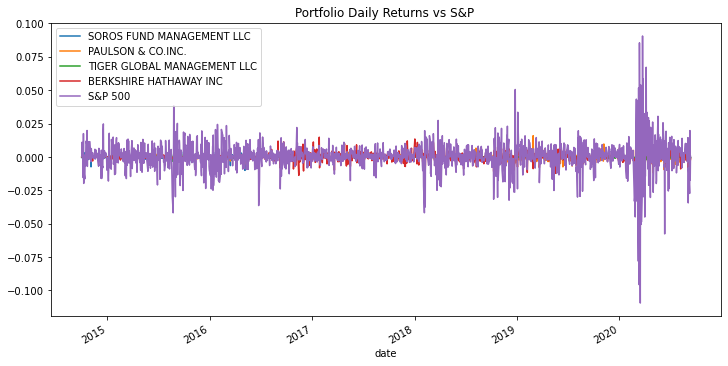

In [202]:
# Plot the daily return data of the 4 funds and the S&P 500 
# Inclue a title parameter and adjust the figure size
# YOUR CODE HERE
daily_returns.plot(figsize=(12,6), title= "Portfolio Daily Returns vs S&P ")


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [208]:
# Calculate and plot the cumulative returns of the 4 fund portfolios and the S&P 500
# Review the last 5 rows of the cumulative returns DataFrame
# YOUR CODE HERE
cumulative_returns = (1 + daily_returns).cumprod() 
cumulative_returns.tail()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Cumulative Returns vs S&P'}, xlabel='date'>

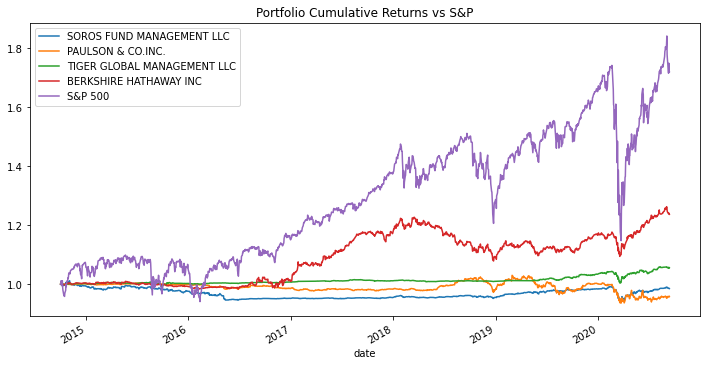

In [209]:
# Visualize the cumulative returns using the Pandas plot function
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
cumulative_returns.plot(figsize=(12,6),title="Portfolio Cumulative Returns vs S&P")

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** # While Berkshire Hathaway enjoyed markedly superior performance over the other portfolios during this time period, the S&P 500 Index appreciated the most growth, albeit with far more volatility than Berkshire's returns.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Volatilities vs S&P'}>

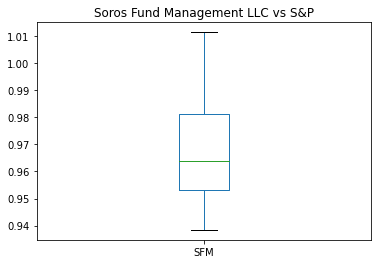

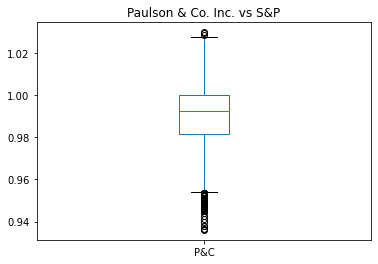

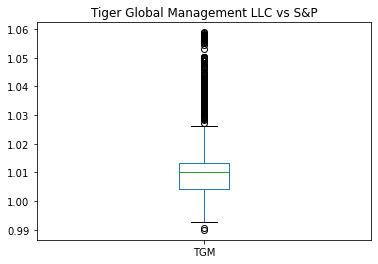

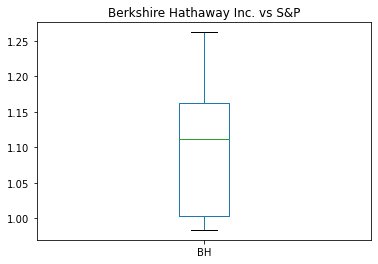

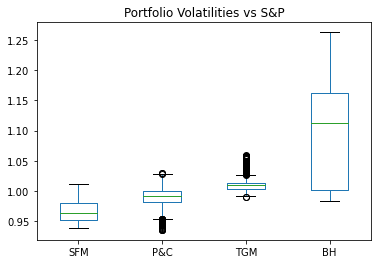

In [210]:
# Use the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
cumulative_returns.columns= ['SFM','P&C','TGM','BH','S&P']
cumulative_returns.plot(kind='box',x='S&P',y='SFM',title='Soros Fund Management LLC vs S&P')
cumulative_returns.plot(kind='box',x='S&P',y='P&C',title='Paulson & Co. Inc. vs S&P')
cumulative_returns.plot(kind='box',x='S&P',y='TGM',title='Tiger Global Management LLC vs S&P')
cumulative_returns.plot(kind='box',x='S&P',y='BH',title='Berkshire Hathaway Inc. vs S&P')
print()
cumulative_returns.plot(kind='box',x='S&P',title='Portfolio Volatilities vs S&P')




#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [171]:
# Create a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
# Create box plots to reflect the return data for only the 4 fund portfolios
# Include a title parameter and adjust the figure size
# YOUR CODE HERE


"" """"  I was working through this.. :

#portfolio_compare= cumulative_returns.drop(columns='S&P 500',inplace=True)

portfolio_compare.plot(kind='box'x=,y=['SFM','P&C','TGM','BH'])

portfolio_compare.columns= ['SFM','P&C','TGM','BH']

print()


..Missed this one, kind of confused on err "[S&P 500'] not found in axis"

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-171-9dc7e446a794>, line 17)

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** # While the S&P saw the most volatility, when used as a benchmark, the Berkshire Hathaway fund saw far more volatility than the other portfolios, while Tiger Global Management's fund experienced the lowest comparative volatility.

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [212]:
# Calculate and sort the standard deviation for all 4 portfolios and the S&P 500
# Review the standard deviations sorted smallest to largest
# YOUR CODE HERE
daily_returns.std().sort_values()


TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [217]:
# Calculate and sort the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
# Review the annual standard deviations smallest to largest
# YOUR CODE HERE

trading_days = 252

# Then multiply that value by the number of trading days in a year, using the trading_days variable set above 
annualized_std = daily_returns.std() * np.sqrt(trading_days)

# Sort the annual average returns for the cryptocurrencies from lowest to highest
annualized_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Window Comparison'}, xlabel='date'>

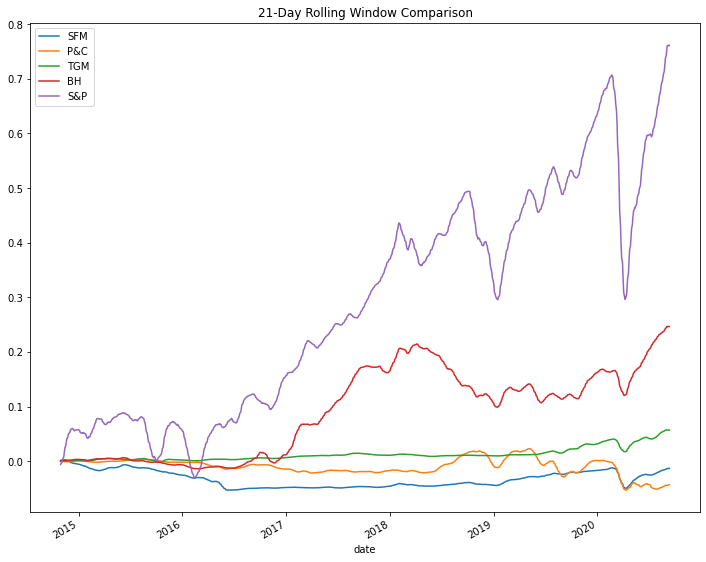

In [199]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plot the rolling standard deviation of the 4 portfolios and the S&P 500
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

daily_returns_rolling = cumulative_returns.rolling(window=21).mean()
daily_returns_rolling.plot(figsize=(12,10),title='21-Day Rolling Window Comparison')


#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

In [215]:
# Using the daily return data and a 21-day rolling window, plot the rolling standard deviation of just the 4 portfolios. 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE

daily_returns.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
count,1497.000000,1497.000000,1497.000000,1497.000000,1497.000000
mean,-0.000009,-0.000026,0.000036,0.000147,0.000429
std,0.001405,0.002199,0.000996,0.003256,0.011550
min,-0.012910,-0.016720,-0.014563,-0.019076,-0.109424
25%,-0.000381,-0.000534,-0.000193,-0.001082,-0.003197
50%,0.000004,-0.000012,0.000007,0.000027,0.000549
75%,0.000440,0.000498,0.000240,0.001515,0.005160
max,0.011505,0.015944,0.010128,0.021761,0.090603


#### Step 5: Answer the following three questions:

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** # Based on the annualized STD, no portfolios pose a greater risk than the S&P

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** # Based on the rolling metrics, the other portfolios do have proportional increases in risk compared at the same time with the S&P, indicating a correlation.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** # Berkshire Hathaway has the highest level of volatility of the four, with volatility that is correlated to the S&P's risk profile but does not experience the same level of downside movement at specific points in time.

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [216]:
# Calculate the annual average return data for the for fund portfolios and the S&P 500
# Use 252 as the number of trading days in the year
# Review the annual average returns sorted from lowest to highest
# YOUR CODE HERE
trading_days = 252

annual_average_returns = daily_returns.mean() * trading_days
annual_average_returns.sort_values()


PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [219]:
# Calculate the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
# Review the Sharpe ratios sorted lowest to highest
# YOUR CODE HERE
sharpe_ratios = annual_average_returns / annualized_std
sharpe_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios'}>

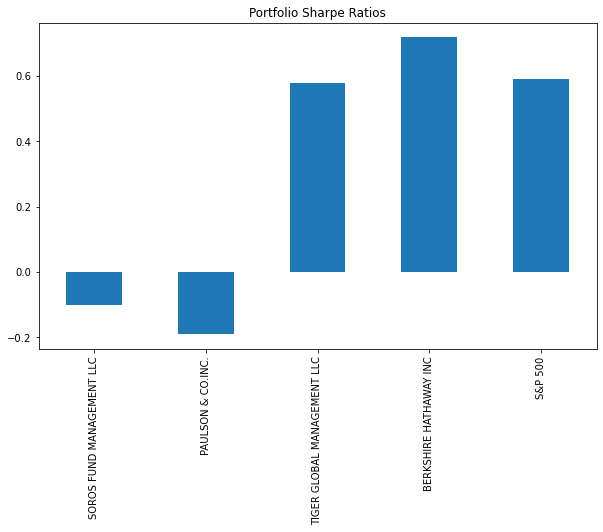

In [221]:
# Visualize the Sharpe ratios as a bar chart
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
sharpe_ratios.plot.bar(figsize=(10, 6), title="Portfolio Sharpe Ratios")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** # Berkshire Hathaway offers the best risk-return profile, while Paulson & Co. offers the worst.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [228]:
# Calculate the variance of the S&P 500 using a rolling 60-day window.
# YOUR CODE HERE

market_variance = daily_returns['S&P 500'].rolling(window=60).var().dropna()
market_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [229]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE

bh_covariance = daily_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).var().dropna()
bh_covariance.tail()

date
2020-09-04    0.000012
2020-09-08    0.000012
2020-09-09    0.000012
2020-09-10    0.000012
2020-09-11    0.000012
Name: BERKSHIRE HATHAWAY INC, dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [233]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE

bh_beta = bh_covariance / market_variance
bh_beta.tail()


date
2020-09-04    0.112154
2020-09-08    0.101932
2020-09-09    0.097841
2020-09-10    0.097779
2020-09-11    0.098239
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [236]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE

bh_rolling_60_beta = bh_beta.mean()
bh_rolling_60_beta


0.2166926624735606

##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Berkshire Hathaway Rolling 60-Day Beta'}, xlabel='date'>

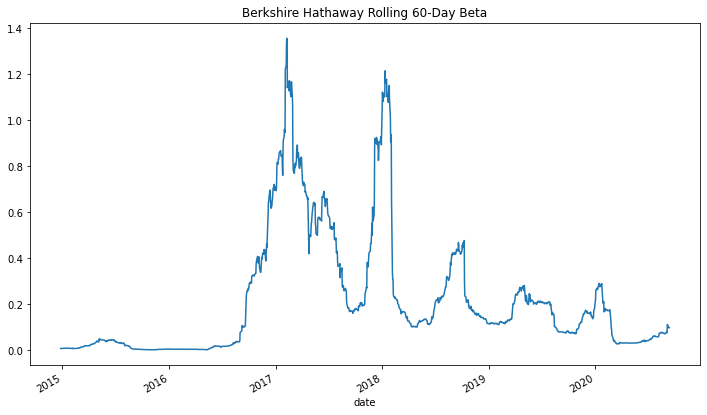

In [237]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HER

bh_beta.plot(figsize=(12,7),title='Berkshire Hathaway Rolling 60-Day Beta')


##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [238]:
# Calculate the covariance using a 60-day rolling window 
# Review the last five rows of the covariance data
# YOUR CODE HERE

covariance_tgm = daily_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).var().dropna()
covariance_tgm.tail()


date
2020-09-04    0.000002
2020-09-08    0.000002
2020-09-09    0.000002
2020-09-10    0.000002
2020-09-11    0.000002
Name: TIGER GLOBAL MANAGEMENT LLC, dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [239]:
# Calculate the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Review the last five rows of the beta information
# YOUR CODE HERE

tgm_beta = covariance_tgm / market_variance
tgm_beta.tail()


date
2020-09-04    0.014810
2020-09-08    0.013272
2020-09-09    0.013605
2020-09-10    0.013790
2020-09-11    0.013896
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [240]:
# Calculate the average of the 60-day rolling beta
# YOUR CODE HERE

tgm_rolling_60_beta = tgm_beta.mean()
tgm_rolling_60_beta


0.006197888628540725

##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Tiger Global Management LLC Rolling 60-Day Beta'}, xlabel='date'>

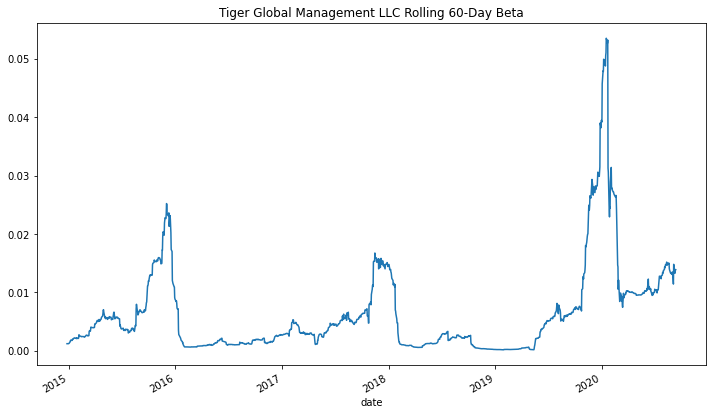

In [242]:
# Plot the rolling beta 
# Include a title parameter and adjust the figure size
# YOUR CODE HERE
tgm_beta.plot(figsize=(12,7),title='Tiger Global Management LLC Rolling 60-Day Beta')


#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # Berkshire Hathaway, with the highest beta, appears most sensitive to movements in the S&P.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # Berkshire Hathaway's portfolio is the strongest option based on sharpe ratio and beta, which suggest that the portfolio has minimal deviation from the market.

---